 #  A Whale off the Port(folio)
 ---

In this task, we use the learnings from week-3 and week-4 to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Wrangling

In this section, we read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, we combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns = pd.read_csv("whale_returns.csv", index_col="Date")

In [3]:
# Reading whale returns
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


The data frame indicates that the date columns are sorted in ascending order and do no require additional sorting. Else this code can be used. 

__Sorting the index__

`whale_returns = whale_returns.sort_index(ascending=True)`

`whale_returns.head()`

In [5]:
# Converting the index to datetime format
whale_returns.index = pd.to_datetime(whale_returns.index, format = 'mixed')

# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
# Rewriting the original dataframe
whale_returns = whale_returns.dropna()

# Check
# whale_returns.isnull().sum()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns = pd.read_csv("algo_returns.csv", index_col="Date")
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


The data frame indicates that the date columns are sorted in ascending order and do no require additional sorting. Else this code can be used. 

__Sorting the index__

`algo_returns = algo_returns.sort_index(ascending=True)`

`algo_returns.head()`

In [9]:
# Converting the index to datetime format
algo_returns.index = pd.to_datetime(algo_returns.index, format = 'mixed')

# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
# Rewriting the original dataframe
algo_returns = algo_returns.dropna()

# Check
# algo_returns.isnull().sum()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = pd.read_csv("sp_tsx_history.csv", index_col = "Date")
sp_tsx.head()

,Close
Date,
1-Oct-2012,"$12,370.19"
2-Oct-2012,"$12,391.23"
3-Oct-2012,"$12,359.47"
4-Oct-2012,"$12,447.68"
5-Oct-2012,"$12,418.99"


In [12]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
# Bring all dates into one format type
sp_tsx.index = pd.to_datetime(sp_tsx.index, format = 'mixed')

# Remove dollar sign and any other non-numeric characters from the "Close" column
sp_tsx["Close"] = sp_tsx["Close"].str.replace('[^\d.]', '', regex=True)

# Convert the "Close" column to float
sp_tsx["Close"] = sp_tsx["Close"].astype(float)

# Check the new data frame
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


The data frame indicates that the date columns are sorted in ascending order and do no require additional sorting. Else this code can be used. 

__Sorting the index__

`sp_tsx = sp_tsx.sort_index(ascending=True)`

`sp_tsx.head()`

In [14]:
# Calculate Daily Returns
daily_returns = sp_tsx.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
daily_returns = daily_returns.dropna()
daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ["S&P TSX"]
daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Concatenate the DataFrames
combined_df = pd.concat([whale_returns, algo_returns, daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, we calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

### Calculate and Plot the daily returns

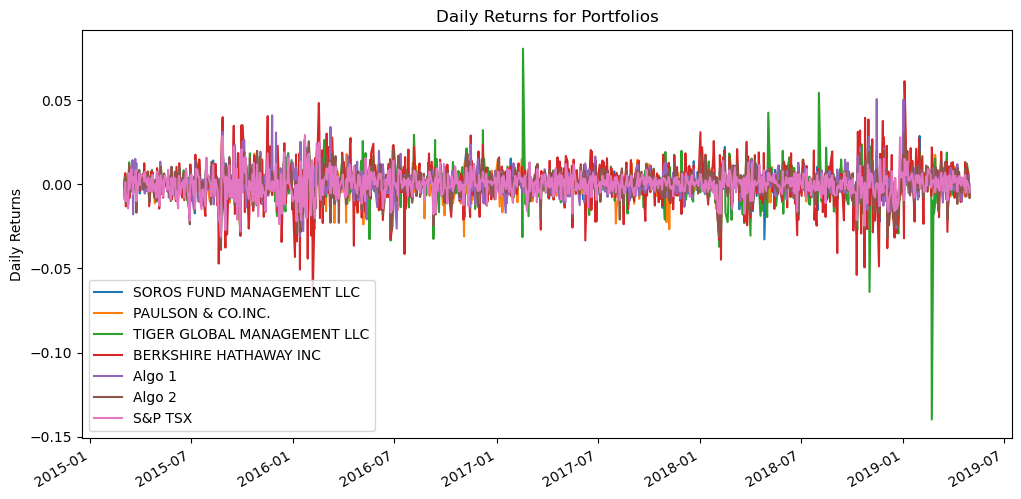

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(12, 6))
plt.title("Daily Returns for Portfolios")
plt.xlabel("")
plt.ylabel("Daily Returns")
plt.legend(loc="lower left")
plt.show()

### Calculate and Plot cumulative returns.

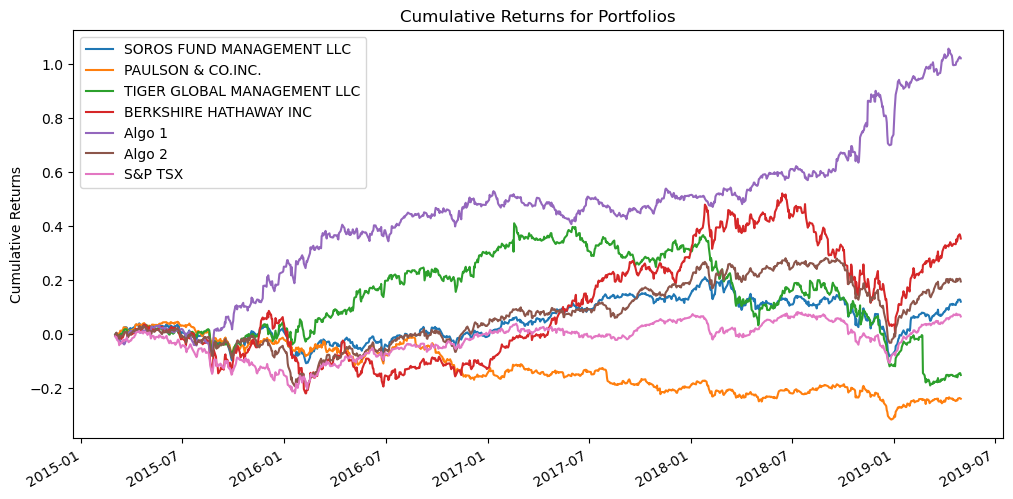

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns for all portfolios
cumulative_returns.plot(figsize=(12, 6))
plt.title("Cumulative Returns for Portfolios")
plt.xlabel("")
plt.ylabel("Cumulative Returns")
plt.legend(loc="upper left")
plt.show()

### Outperformers of S&P TSX

* From the cumulative returns plot it can be observed that the Algorithm 1 outperforms S&P TSX 60 throughut the entire time period.

* Tiger Global Management LLC outperforms it till the 1st month of 2019.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


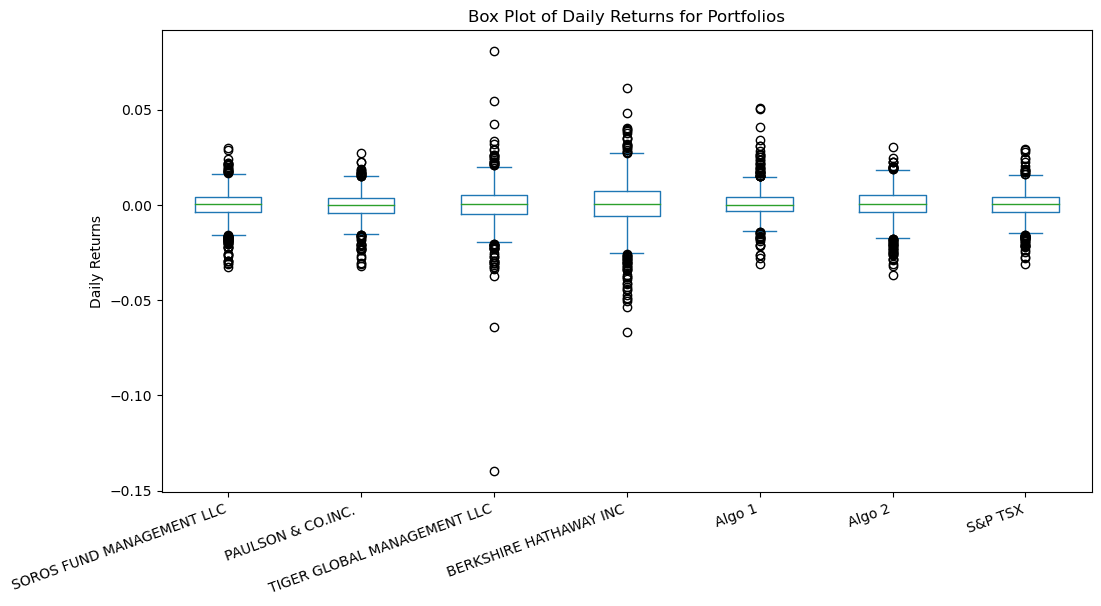

In [20]:
combined_df.plot.box(figsize=(12, 6))
plt.title("Box Plot of Daily Returns for Portfolios")
plt.ylabel("Daily Returns")
plt.xticks(rotation=20, ha="right")
plt.show()

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
std_deviation = combined_df.std()
std_deviation

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Compare each portfolio's standard deviation with the last portfolio
riskier_portfolios = std_deviation > std_deviation.iloc[-1]

# Print the portfolios with a standard deviation greater than S&P TSX 60
print("Portfolios with Standard Deviation Greater Than the S&P TSX 60:")
print(std_deviation[riskier_portfolios])

Portfolios with Standard Deviation Greater Than the S&P TSX 60:
SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64


__As observed the portfolios riskier than S&P TSX 60 are__ 
* SOROS FUND MANAGEMENT LLC
* TIGER GLOBAL MANAGEMENT LLC
* BERKSHIRE HATHAWAY INC
* Algo 1
* Algo 2

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
# Volatility
annualized_std_deviation = std_deviation * np.sqrt(252)
annualized_std_deviation

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

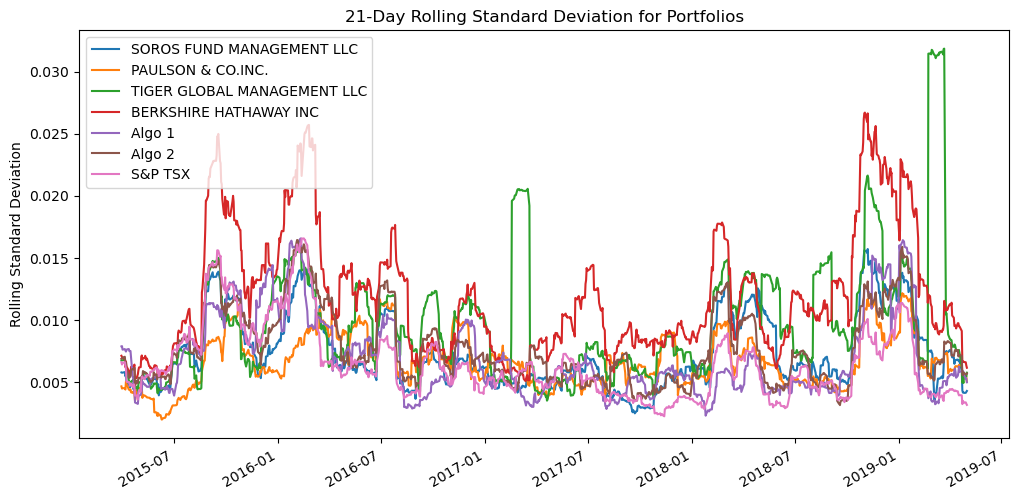

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(12, 6))
plt.title("21-Day Rolling Standard Deviation for Portfolios")
plt.xlabel("")
plt.ylabel("Rolling Standard Deviation")
plt.legend(loc="upper left")
plt.show()

### Calculate and plot the correlation

In [25]:
# Calculate the correlation between each column
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [26]:
correlation.sum(axis = 0).sort_values()

Algo 1                         2.626504
TIGER GLOBAL MANAGEMENT LLC    3.526030
PAULSON & CO.INC.              4.097032
S&P TSX                        4.205921
BERKSHIRE HATHAWAY INC         4.244975
Algo 2                         4.714805
SOROS FUND MANAGEMENT LLC      4.822611
dtype: float64

<Axes: >

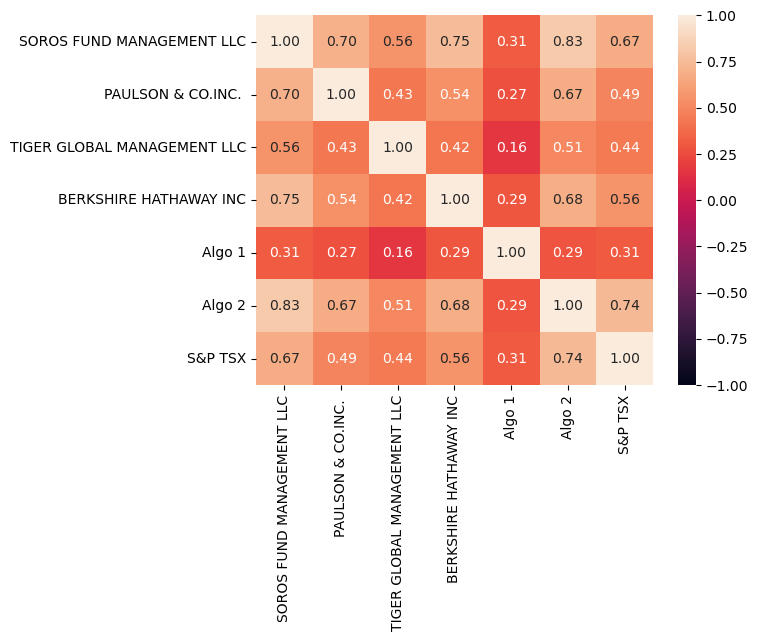

In [27]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, fmt=".2f")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

***Here we take the BERKSHIRE HATHAWAY INC Portfolio***

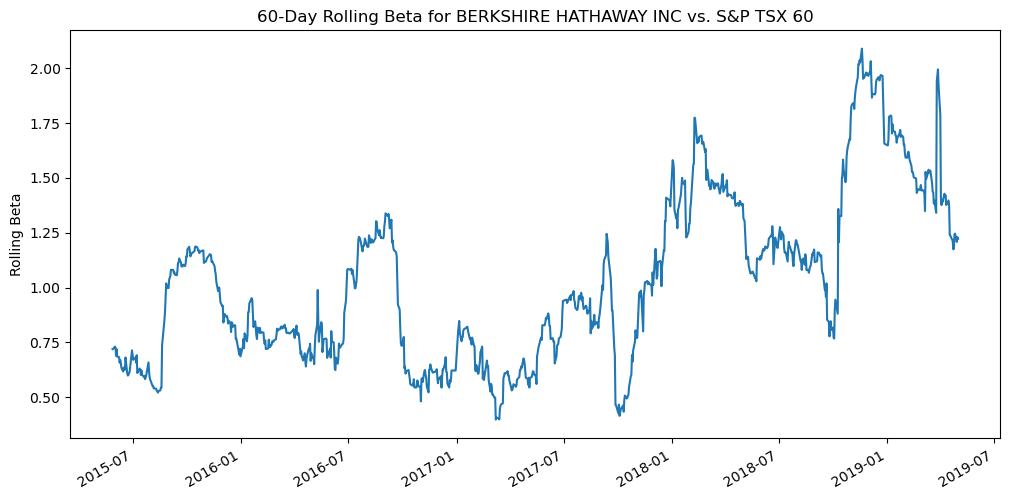

In [28]:
# Calculate covariance of a single portfolio - "BERKSHIRE HATHAWAY INC"
rolling_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["S&P TSX"])

# Calculate variance of S&P TSX
rolling_variance = combined_df["S&P TSX"].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot 60-day rolling beta
rolling_beta.plot(figsize=(12, 6))
plt.title("60-Day Rolling Beta for BERKSHIRE HATHAWAY INC vs. S&P TSX 60")
plt.xlabel("")
plt.ylabel("Rolling Beta")
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. We calculate the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [29]:
# Use `ewm` to calculate the rolling window
ewm_std = combined_df.ewm(halflife=21).std()
ewm_std.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.005485


---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / annualized_std_deviation
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

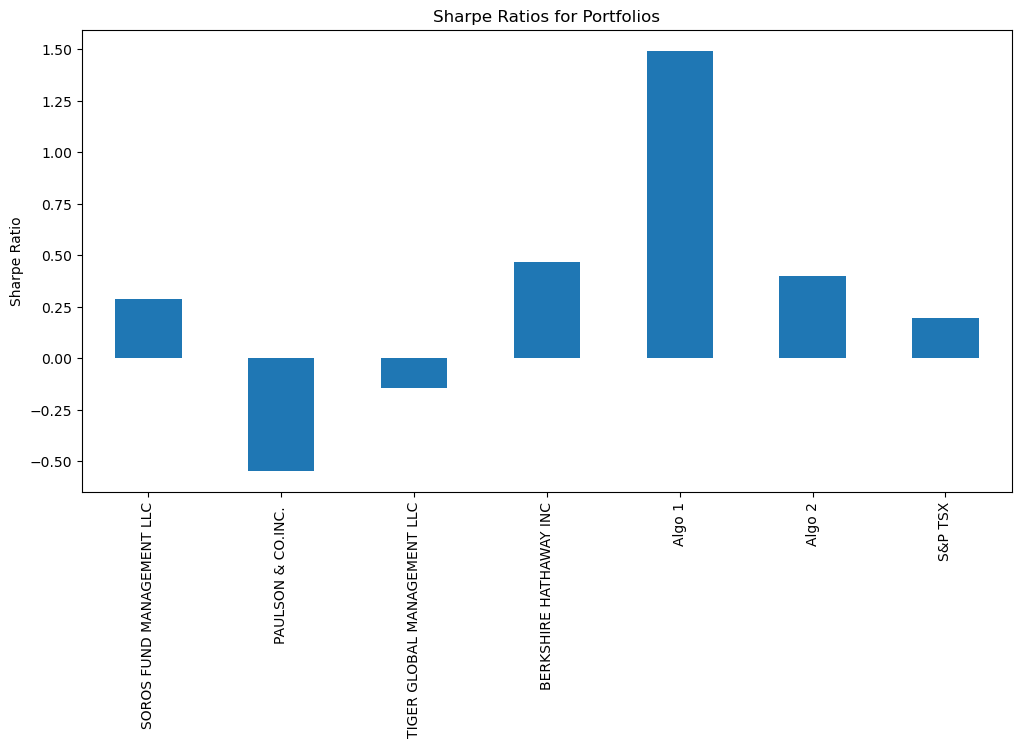

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(12, 6))
plt.title("Sharpe Ratios for Portfolios")
plt.ylabel("Sharpe Ratio")
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
<br>

* __Algo 1__ (Sharpe ratio 1.491514) outperforms both the market (S&P TSX 60) and the whales portfolios.

* __Algo 2__ (Sharpe ratio 0.396817) does not outperform Algo 1 but outperforms the following whale portfolios: SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC, TIGER GLOBAL MANAGEMENT LLC as well as the market (S&P TSX 60).

---

# Create Custom Portfolio

In this section, we build our own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock
l_data = pd.read_csv("l_historical.csv", index_col="Date")

# Converting the index to datetime format
l_data.index = pd.to_datetime(l_data.index, format = 'mixed')

# Sorting the dates in an ascending order
l_data = l_data.sort_index(ascending=True)

# Check and Drop nulls if applicable
# l_data.isnull().sum()
# l_data.dropna()

l_data.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [33]:
# Reading data from 2nd stock
otex_data = pd.read_csv("otex_historical.csv", index_col="Date")

# Converting the index to datetime format
otex_data.index = pd.to_datetime(otex_data.index, format = 'mixed')

# Sorting the dates in an ascending order
otex_data = otex_data.sort_index(ascending=True)

# Check and Drop nulls if applicable
# otex_data.isnull().sum()
# otex_data.dropna()

otex_data.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [34]:
# Reading data from 3rd stock
shop_data = pd.read_csv("shop_historical.csv", index_col="Date")

# Converting the index to datetime format
shop_data.index = pd.to_datetime(shop_data.index, format = 'mixed')

# Sorting the dates in an ascending order
shop_data = shop_data.sort_index(ascending=True)

# Check and Drop nulls if applicable
# shop_data.isnull().sum()
# shop_data.dropna()

shop_data.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [35]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([l_data, otex_data, shop_data], axis="rows", join="inner")
all_stocks.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [36]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Date,Symbol,Close
0,2018-01-02,L,57.99
1,2018-01-03,L,57.41
2,2018-01-04,L,57.42
3,2018-01-05,L,57.42
4,2018-01-08,L,56.86


In [37]:
# Reorganize portfolio data by having a column per symbol
all_stocks = all_stocks.pivot_table(values="Close", index="Date", columns="Symbol")
all_stocks.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [38]:
# Calculate daily returns
# Drop NAs
# Display sample data

returns = all_stocks.pct_change().dropna()
returns.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data - skipping it as we display the dataframe directly

portfolio_returns = returns.dot(weights)

portfolio_returns_df = pd.DataFrame({"Custom Portfolio": portfolio_returns})

# Display the DataFrame
portfolio_returns_df.head()

,Custom Portfolio
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_combined_df = pd.concat([combined_df, portfolio_returns_df], axis="columns", join="inner")
portfolio_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_combined_df = portfolio_combined_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized standard deviation (252 trading days)
# Volatility
annualized_std_portfolio = portfolio_combined_df.std() * np.sqrt(252)
annualized_std_portfolio

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
Custom Portfolio               0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

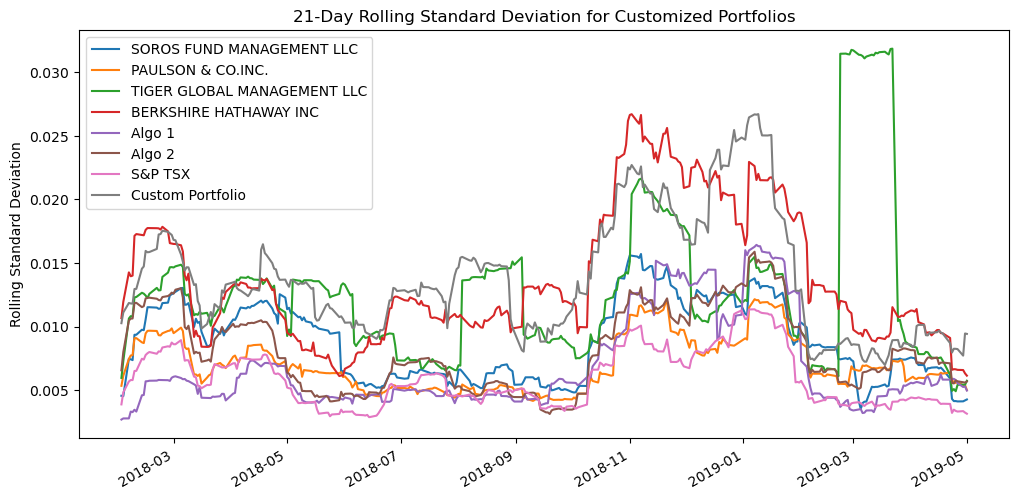

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_portfolio = portfolio_combined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std_portfolio.plot(figsize=(12, 6))
plt.title("21-Day Rolling Standard Deviation for Customized Portfolios")
plt.xlabel("")
plt.ylabel("Rolling Standard Deviation")
plt.legend(loc="upper left")
plt.show()

### Calculate and plot the correlation

<Axes: >

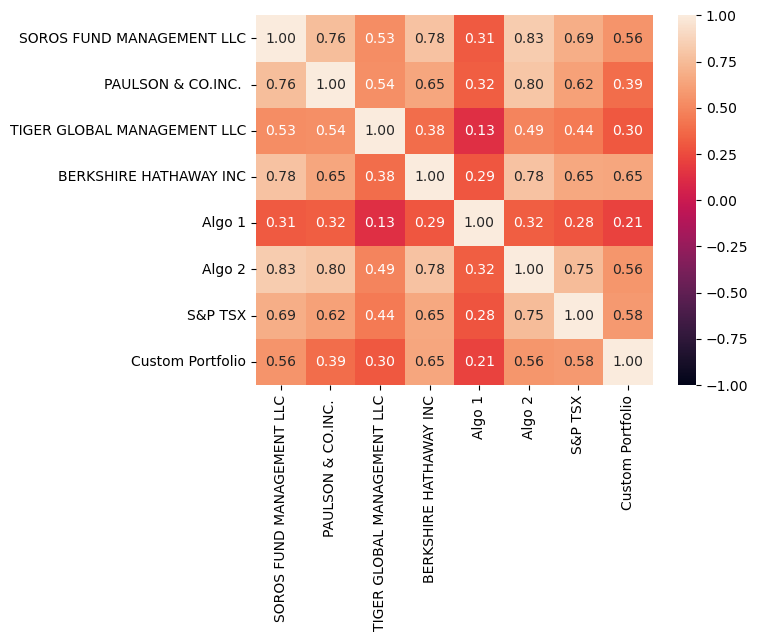

In [44]:
# Calculate and plot the correlation
portfolio_correlation = portfolio_combined_df.corr()

# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

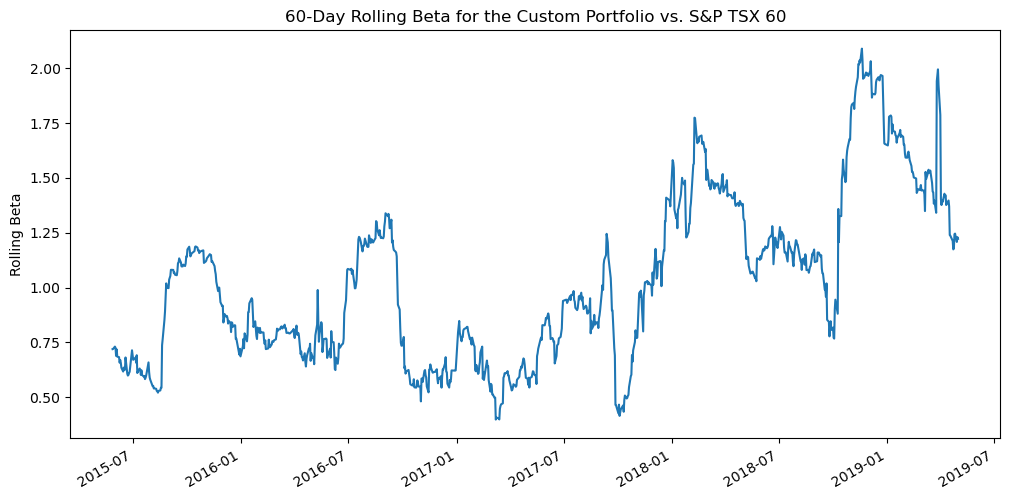

In [45]:
# Calculate covariance of a single portfolio - "BERKSHIRE HATHAWAY INC"
rolling_covariance_custom = portfolio_combined_df["Custom Portfolio"].rolling(window=60).cov(combined_df["S&P TSX"])

# Calculate variance of S&P TSX
rolling_variance_custom = portfolio_combined_df["S&P TSX"].rolling(window=60).var()

# Computing beta
rolling_beta_custom = rolling_covariance / rolling_variance

# Plot 60-day rolling beta
rolling_beta_custom.plot(figsize=(12, 6))
plt.title("60-Day Rolling Beta for the Custom Portfolio vs. S&P TSX 60")
plt.xlabel("")
plt.ylabel("Rolling Beta")
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Annualized Sharpe Ratios
sharpe_ratios_custom = (portfolio_combined_df.mean() * 252) / annualized_std_portfolio
sharpe_ratios_custom

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Custom Portfolio               1.564547
dtype: float64

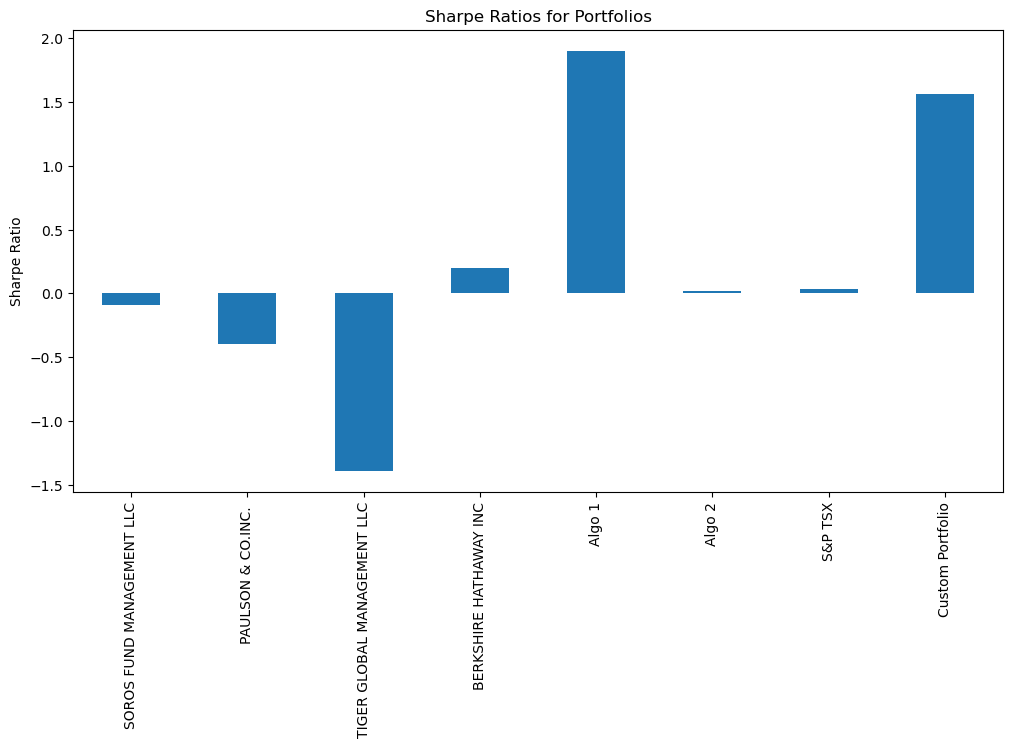

In [47]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind="bar", figsize=(12, 6))
plt.title("Sharpe Ratios for Portfolios")
plt.ylabel("Sharpe Ratio")
plt.show()

### How does your portfolio do?
<br>

The **Custom Portfolio** outperforms all the whale portfolios, algorithm-2 and the market (S&P TSX 60). It fails to outperform the algortihm - 1 though.